# Stoneburner, Kurt
- ## DSC 530 - Week05
- ## Chapter 5, Exercise 1


In [6]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
workingPath = os.getcwd().replace("coding", "ThinkStats2\\code")
sys.path.insert(1, workingPath)
os.chdir(workingPath)

In [7]:
# //*** Imports and Load Data
#import markdown
import nsfg
import thinkstats2
import thinkplot
import first
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import analytic
import scipy

#resp = nsfg.ReadFemResp()
#preg = nsfg.ReadFemPreg()



**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [8]:
# //*** scipy.stats.norm returns a normal distribution
# //*** The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
#print(type(dist))

#A "frozen random variable" can compute its mean and standard deviation.
#print(dist.mean(), dist.std())

#It can also evaluate its CDF. How many people are more than one standard deviation below the mean? About 16%
#dist.cdf(mu-sigma)

In [9]:
def inches_to_cm(defInput):
    # //****************************************************************
    # //*** Convert Inches to feet, because I can't do this in my head
    # //*** Expected input defInput: feet: Number of Feet to convert
    # //***                                Number of Inches to Convert
    # //***                                Returns Centimenters as int
    # //****************************************************************
    
    conversion_rate = 2.54
    
    total_cm = 0
    
    # //*** Convert feet to cm Feet * 12 * conversion_rate
    if 'feet' in defInput.keys():
        total_cm = total_cm + (defInput['feet'] * 12 * conversion_rate)
    # //*** Convert Inches by multiplying vallue by conversion rate
    if 'inches' in defInput.keys():
        total_cm =  total_cm + (defInput['inches'] * conversion_rate)
    
    return total_cm

In [92]:
# //*** Generate Min and Max height in cm.
minHeight = inches_to_cm({'feet':5,'inches':10})
maxHeight = inches_to_cm({'feet':6,'inches':1})

print(f"Min Height cm: {minHeight} Max Height cm: {maxHeight}")

# //*** Get the percentage of population that qualifies for the minimum height.
# //*** This finds everyone below the minimum, so subtract from 1 to get everyone
# //*** Above the minimum
minQualified = 1 - dist.cdf(minHeight)
# //*** Get the percentage of population that qualifies for the Maximum height.
maxQualified = dist.cdf(maxHeight)
print(f"{round(minQualified*100,4)}% is tall enough to join the Blue Man Group")
print(f"{round(maxQualified*100,4)}% is not too tall to join the Blue Man Group")
# //*** The answer in the maxHeight - minHeight
print(f"Estimated {round( (maxQualified - minQualified) * 100,4)}% of US male population is within the height range of 5'10\" - 6'1\"")

Min Height cm: 177.8 Max Height cm: 185.42
51.0361% is tall enough to join the Blue Man Group
83.2386% is not too tall to join the Blue Man Group
Estimated 32.2025% of US male population is within the height range of 5'10" - 6'1"


- ## Chapter 5, Exercise 2

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this Distribution

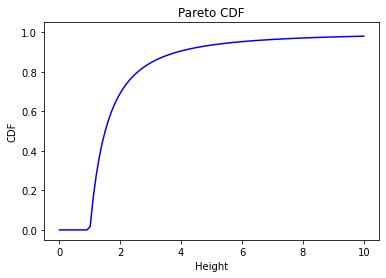

2.428571428571429
1.5034066538560549


In [143]:
# //*** Generate a pareto CDF from a set of 100 numbers evenly incremented from 1 - 10.
pareto_cdf_series = pd.Series(index = scipy.stats.pareto.cdf(heights,scale=1, b=1.7), data=np.linspace(0,10,100))

# //*** Histogram with matplotlib
plt.plot(pareto_cdf_series, pareto_cdf_series.index.values, 1, color='b')
plt.title("Pareto CDF")
plt.xlabel('Height')
plt.ylabel('CDF')
plt.show()

pareto_dist = scipy.stats.pareto(b=1.7,scale=1)
print(pareto_dist.mean())
print(pareto_dist.median())

# //*** Raw Pareto Calculations to work out later
#xs = heights xmin = minimum alpha = 1,7
#calc_pareto = 1- (heights / 1) ** 1.7
#ps = 1 - (xs / xmin) ** -alpha
#ps = stats.pareto.cdf(xs, scale=xmin, b=alpha)


What is the mean human height in Pareto world?

In [111]:
pareto_cdf_mean = pareto_dist.mean()
print(f"Mean human height in Pareto World is {pareto_cdf_mean}")

Mean human height in Pareto World is 2.428571428571429


What fraction of the population is shorter than the mean? 

In [115]:
print(f"{pareto_dist.cdf(pareto_cdf_mean)*100}% of the total population is shorter than the mean")

77.87396975652881% of the total population is shorter than the mean


If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? 

In [122]:
# //*** Find the CDF of 1000m. Subtract from 1 to get everyone above.
# //*** Multiply time 7 Billion
pareto_giants = int( (1 - pareto_dist.cdf(1000)) * 7000000000)
print(f"In Pareto World {pareto_giants} people out of 7 billon will be over 1km tall.")

In Pareto World 55602 people out of 7 billon will be over 1km tall.


How tall do we expect the tallest person to be?

scipy.stats.pareto represents a pareto distribution. In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter. So the shortest person is 100 cm and the median is 150.

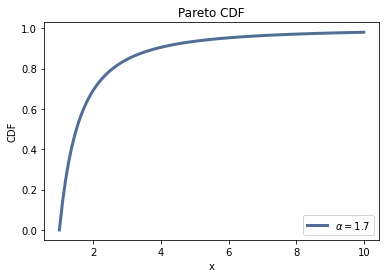

In [90]:
# //*** Text Reference for Pareto Distribution
xmin = 1

thinkplot.PrePlot(3)
for alpha in [1.7]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
    thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

- ## Chapter X, Exercise X



In [12]:
# //*** CODE HERE

- ## Chapter X, Exercise X



In [13]:
# //*** CODE HERE